# Part 1

In [22]:
import pandas as pd

df = pd.read_csv('~/Downloads/Nat_Gas.csv', parse_dates = ['Dates'])
df['Dates'] = pd.to_datetime(df['Dates'], format = '%m/%d/%y')
df['Days'] = (df['Dates'] - df['Dates'].min()).dt.days

/var/folders/yp/gd5qybd13fj3fxq5zrf2x4sr0000gn/T/ipykernel_1092/752340041.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('~/Downloads/Nat_Gas.csv', parse_dates = ['Dates'])


In [ ]:
#print(df['Days'].head())

0      0
1     30
2     61
3     92
4    120
Name: Days, dtype: int64


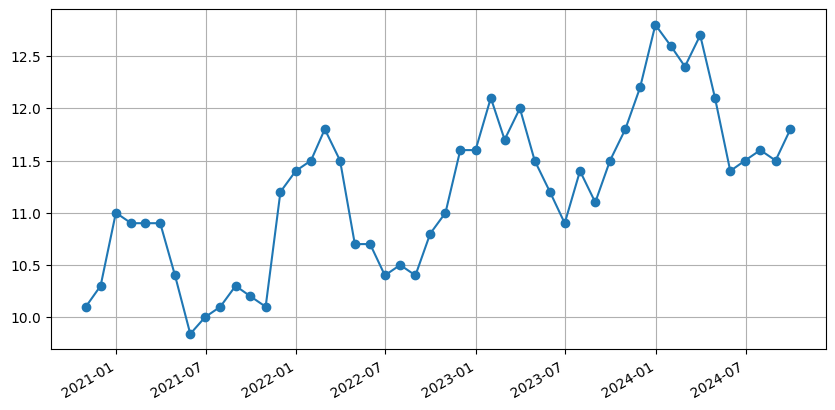

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(df['Dates'], df['Prices'], marker = 'o')

plt.xlabel = 'Date'
plt.ylabel = 'Price'
plt.grid(True)
plt.gcf().autofmt_xdate()

plt.show()

[ 0.          1.          2.03333333  3.06666667  4.          5.03333333
  6.03333333  7.06666667  8.06666667  9.1        10.13333333 11.13333333
 12.16666667 13.16666667 14.2        15.23333333 16.16666667 17.2
 18.2        19.23333333 20.23333333 21.26666667 22.3        23.3
 24.33333333 25.33333333 26.36666667 27.4        28.33333333 29.36666667
 30.36666667 31.4        32.4        33.43333333 34.46666667 35.46666667
 36.5        37.5        38.53333333 39.56666667 40.53333333 41.56666667
 42.56666667 43.6        44.6        45.63333333 46.66666667 47.66666667]
(48,)


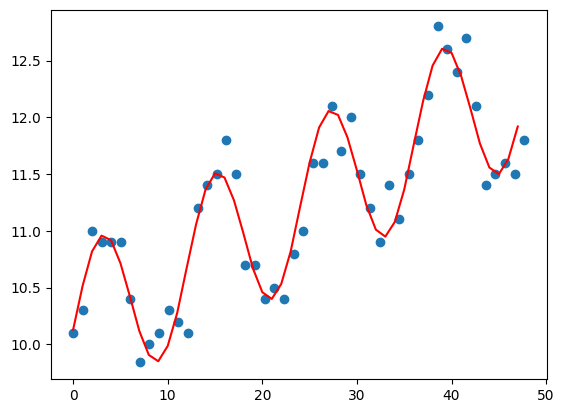

In [ ]:
import numpy
import torch
from scipy.optimize import curve_fit

def model(x, a, b, c, d):
    return a * x + b * numpy.sin(c*x) + d

x_data = df['Days'].values/30
y_data = df['Prices'].values
#print(x_data)
#print(y_data.shape)
x = numpy.linspace(0, 1800, 1)

params, _ = curve_fit(model, x_data, y_data, p0 = [1, 1, 0.5, 10])
a_fit, b_fit, c_fit, d_fit = params

plt.scatter(x_data, y_data, label = 'Data')
plt.plot(model(x_data, a_fit, b_fit, c_fit, d_fit), color = 'red', label = 'Fitted Data')



In [ ]:
def extrapolate(date):
    days = (date - df['Dates'].min()).days
    months = days/30
    return model(months, *params)

#from datetime import datetime

#date = datetime(2025, 7, 31)

#extrapolate(date)

np.float64(12.047608360887862)

# Part 2

In [97]:
from collections import deque
# Calculates the cost of storing. The complexity here is that each unit can be in storage for a different amount of time. I am assuming a monthly rate
def storage_cost(stor_rate, in_dates, out_dates, in_out_amt, max_vol):
    cost = 0
    stack = deque()
    p1, p2 = 0, 0
    while p1 < len(in_dates) and p2 < len(out_dates):
        while in_dates[p1] < out_dates[p2]:
            stack.append(in_dates[p1])
            p1 += 1
            if len(stack) * in_out_amt > max_vol or p1 == len(in_dates):
                break
        stack.pop()
        cost += ((out_dates[p2] - in_dates[p1 - 1]).days) * (stor_rate / 30)
        p2 += 1
        if p2 == len(in_dates):
            break

    return cost

In [ ]:
# Calculates valuation of the contract (in millions)
def valuation(in_dates, out_dates, in_out_rate, in_out_amt, max_vol, stor_rate):
    total_val = 0
    # Cost of buying and selling (makes use of dot product)
    in_out_cost = numpy.ones(shape = (len(out_dates))).dot(numpy.vectorize(extrapolate)(out_dates)) - numpy.ones(shape = (len(in_dates))).dot(numpy.vectorize(extrapolate)(in_dates))
    - (len(in_dates) + len(out_dates)) * in_out_rate
    total_val += in_out_cost
    
    # Cost of storage
    stor_cost = storage_cost(stor_rate, in_dates, out_dates, in_out_amt, max_vol)
    if not stor_cost:
        return None
    total_val += stor_cost

    return float(total_val)

In [ ]:
# Testing to make sure it's reasonable

from datetime import datetime

in_dates_str = ['2/28/23', '4/30/23', '6/30/23', '7/31/23', '9/30/23']
out_dates_str = ['3/30/23', '5/30/23', '8/30/23', '10/30/23', '11/30/23']

in_dates = numpy.array([datetime.strptime(d, '%m/%d/%y') for d in in_dates_str])
out_dates = numpy.array([datetime.strptime(d, '%m/%d/%y') for d in out_dates_str])

valuation(in_dates, out_dates, 0.01, 0.2, 1, 0.05)

1.3485729343409474

# Part 3

In [68]:
import pandas as pd
import torch

df = pd.read_csv('~/Downloads/Task 3 and 4_Loan_Data.csv')
labels = df.loc[:, 'default']
df = df.iloc[:, 1:-1]
df = (df - df.mean()) / df.std()

X = torch.tensor(df.values, dtype = torch.float32)
Y = torch.tensor(labels.values, dtype = torch.float32)
Y = Y.reshape(-1, 1)
print(X)
print(Y)




tensor([[-0.8379,  0.7471, -0.7248,  0.3985,  0.2854, -0.5367],
        [ 2.0293, -1.5483, -0.0740, -2.1618, -1.6292, -1.0808],
        [-0.8379, -0.5605, -1.0096, -0.2079, -0.3528, -0.5862],
        ...,
        [ 0.3090, -0.7538, -0.5894, -1.5866,  0.2854, -0.6851],
        [-0.8379, -0.6126, -1.1582, -0.9521, -1.6292,  0.1557],
        [-0.2645, -1.5773, -0.8554, -1.9643,  0.9236,  1.9691]])
tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])


Epoch [10/1000], Loss: 0.8375
Epoch [20/1000], Loss: 0.8007
Epoch [30/1000], Loss: 0.7676
Epoch [40/1000], Loss: 0.7376
Epoch [50/1000], Loss: 0.7103
Epoch [60/1000], Loss: 0.6853
Epoch [70/1000], Loss: 0.6623
Epoch [80/1000], Loss: 0.6411
Epoch [90/1000], Loss: 0.6213
Epoch [100/1000], Loss: 0.6030
Epoch [110/1000], Loss: 0.5858
Epoch [120/1000], Loss: 0.5696
Epoch [130/1000], Loss: 0.5544
Epoch [140/1000], Loss: 0.5400
Epoch [150/1000], Loss: 0.5263
Epoch [160/1000], Loss: 0.5134
Epoch [170/1000], Loss: 0.5010
Epoch [180/1000], Loss: 0.4892
Epoch [190/1000], Loss: 0.4779
Epoch [200/1000], Loss: 0.4670
Epoch [210/1000], Loss: 0.4566
Epoch [220/1000], Loss: 0.4466
Epoch [230/1000], Loss: 0.4369
Epoch [240/1000], Loss: 0.4276
Epoch [250/1000], Loss: 0.4186
Epoch [260/1000], Loss: 0.4098
Epoch [270/1000], Loss: 0.4014
Epoch [280/1000], Loss: 0.3931
Epoch [290/1000], Loss: 0.3851
Epoch [300/1000], Loss: 0.3773
Epoch [310/1000], Loss: 0.3698
Epoch [320/1000], Loss: 0.3624
Epoch [330/1000],

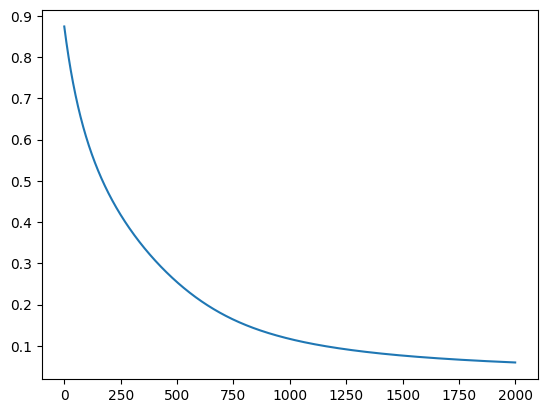

In [77]:
import torch
from torch import nn
import torch.optim as optim

import matplotlib.pyplot as plt

class NeuralRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.LazyLinear(10), nn.ReLU(), nn.LazyLinear(1))

    def forward(self, X):
        return self.net(X)

model = NeuralRegression()

loss = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

loss_vals = []

for epoch in range(2000):
    optimizer.zero_grad()
    outputs = model(X)
    error = loss(outputs, Y)
    error.backward()
    optimizer.step()

    loss_vals.append(error.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{1000}], Loss: {error.item():.4f}')


plt.plot(loss_vals)
plt.xlabel = "Epoch"
plt.ylabel = "error"

In [ ]:
def expected_loss(ind_loan_data):
    loan_amt = float(ind_loan_data[2])
    model_ready = ind_loan_data[1:]
    model_ready = (model_ready - df.mean()) / df.std()
    model_ready = torch.tensor(model_ready, dtype = torch.float32)
    
    model.eval()
    expect_loss = loan_amt * float(0.1) * torch.sigmoid(model(model_ready)).item()
    return expect_loss

expected_loss([float(8153374),float(0),float(5221.545193),float(3915.471226),float(78039.38546),float(5),float(605)])

tensor([-35132.7617], grad_fn=<ViewBackward0>)


/var/folders/yp/gd5qybd13fj3fxq5zrf2x4sr0000gn/T/ipykernel_25611/297058621.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_ready = torch.tensor(model_ready, dtype = torch.float32)


0.0

# Part 4

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
def quantize(num_buckets, df):
    fico_scores = df['fico_scores'].values.reshape(-1, 1)
    clusters = KMeans(n_clusters = num_buckets).fit(fico_scores)

    df['bucket'] = clusters.predict(fico_scores)
    centers = clusters.cluster_centers_.flatten()
    sorted = np.argsort(centers)

    rating_map = {cluster: num_buckets - rank for rank, cluster in enumerate(sorted)}
    df['fico_rating'] = df['bucket'].map(rating_map)

    df = df.drop(columns = 'bucket')
    return df


